# Bayesian Machine Learning in Python: A/B Testing
This notebook collects my notes during the course of [**Bayesian Machine Learning in Python: A/B Testing**](https://www.udemy.com/course/bayesian-machine-learning-in-python-ab-testing/) on Udemy.

The original codes could be found on the GitHub repository: https://github.com/lazyprogrammer/machine_learning_examples/tree/master/ab_testing

## What is Bayesian Machine Learning (Bayesian from the Concept of Machine Learning)
- Bayes Rule is not Bayesian machine learning
- Even MAP (maximum a posteriori) is not Bayesian
- Disregard your preconceived notions about what Bayesian ML is
- This topic has many faces! Learn to recognize them all

### The Bayesian Approach
- Everything is a random variable (include mean and variance)
- We don't solve for $\mu, \sigma^2$
- Instead, we find $p(\mu, \sigma^2 | X)$, the distribution of mu and sigma given $X$.
- We don't find a number (what frequensist does), we find a distribution

### Bayesian Network
- You can model specific dependencies based on your understanding of the system. In this way, you're actually modeling **causation**.
- Bayesian network is actually modeling dependencies.

### Summary
- Bayesian mcahine learning is vast.
- Bayesian ML may even be more complex than deep learning.
- A/B Testing is the most readily applicable of all ML ideas.
- A/B Testing is nice because it has some theory but is very applicable.


## Bayes Rule
Most simple form: $p(A|B) = \frac{p(A, B)}{p(B)}$

A = {Buyes, Does Not Buy}, B = {USA, Canada, Mexico}

The ***joint probability*** of each of the 6 outcomes is each volume divided by total sum. The sum of the joint probabilities are equal to 1.

#### Note - Curse of dimensionality: As the volume grows, we need to do more computation and need more samples (for each combination of dimensions) to get accurate estimates.


The ***conditional proabialities*** in a given country is the joint probability divided by the marginal probability of the contry. The sum of probabilities here becomes 3: **When the contry is given, the country is not random anymore. The space of random variables is only buy/not buy.**

### Independence
**When 2 variables are independent, the joint probability becomes the muptiple of the margins**, e.g. if A & B are independent:
$$p(A,B) = p(A)p(B)$$
So, if Buy and Country are independent:
$$p(Buy | Country) = \frac{p(Buy, Country)}{p(Country)} = \frac{p(Buy) p(Country)}{p(Country)} = p(Buy)$$

**The conditional probability just becoms the marginal proabability.**

Note for intuition: The conditional probability has no difference to marginal probability any more when the two varialbes are independent.

### Manipulating Bayes Rules

$$ p(A|B) = \frac{p(A, B)}{p(B)} = \frac{p(B |A)p(A)}{p(B)} $$

Often time, We are interested in solving $p(A|B)$ but don't know $p(B)$. 

$$p(A|B) = \frac{p(B|A) p(A)}{Z} $$
We can also think of the bottom term as a "normalization constant" so that the distribution sums to 1:

$$p(A|B) \propto p(B|A)p(A)$$
Many times, we just want the $\operatorname*{argmax}_A P(A|B)$

$Z$ is independent of A, so:
$$\operatorname*{argmax}_Ap(A|B) = \operatorname*{argmax}_A p(B|A)p(A)$$


$$ p(A|B)p(B) = p(B|A)p(A) $$

### Bayes for Classification
$$p(y|x) = \frac{p(x|y)p(y)}{p(x)}$$
$p(x|y)$ is a generative distribution - it tells us **"what does x look like? given the class if y."**

**While a Bayes classifier makes use of Bayes rule, it does NOT necessarily make use of Bayesian statistics.**


## Confidence Interval

When X is a random variable, it has a probability distribution, a mean, variance, etc. 
- The trick here is that our estimate of the mean is also a RV.
- Recall from your introductory probability studies the CLT (Central Limit Theorem)
- States that sum of IID random variables tends to a Gaussian distribution
$$ \hat{\mu} \sim N(\mu,\sigma^2/N)$$

### Frequentist (point estimate)
$$ \hat{\theta} = \operatorname*{argmax}_{\theta} P(X|\theta)$$

In frequentist statistics, We're trying to find the argmax of the likelihood. To get confidence interval, we get point estimate on parameters and then apply Gaussian distribution.
- **Parameters of distribution ($\mu, \sigma$) are set**, we just don't know what they are.
- **Data is randomly generated** via those distributions/parameters

### Bayesian (distribution)
$$P(\theta|X)$$

In Bayesian statistic, We're trying to find the posterior distribution of the parameter. The confidence interval is kind of built in into distribution.

**NOTE - Perhaps the MOST IMPORTANT INTUITION: We don't know the distribution nor make assumption on the distribution (like Gaussian). Instead, we want to find out the (posterior) distribution. That's why the Bayesian approach is always about finding the distribution!**
- **Parameters are random variables that have distributions**
- **Data is fixed**
- In this way, we can model p(param | data)

***NOTE: The two concepts are opposite in terms of which is given and with is fixed.***

**Frequentist: Distribution is fixed (always Gaussian); Data is (randomly) given**

**Bayesian: Data is fixed (certain); Distribution is given (by the data)**

## Traditional A/B Testing
### Set up
$$\mu_1 =? \ \mu_2$$
- Signimicance level = $\alpha$ (5%, 1% common)
- Is the difference in mean between two groups statitically significant at significance level $\alpha$?

### Hypothesis
- Null hypothesis (no difference) $H_0: \mu_1 = \mu_2$
- Alternative hyposesis (one-sided test) $H_1: \mu_1 > \mu_2$
- Alternative hyposesis (two-sided test) $H_1: \mu_1 \neq \mu_2$

### A/B Testing Recipe
- We assume Gaussian distribution
- We create a "test statistics" called "t"
$$ t = \frac{\bar{x}_1 = \bar{x}_2}{s_p\sqrt{\frac{1}{n_1}+\frac{1}{n_2}}}, \ where\ s_p = \sqrt{\frac{(n_1-1)s^2_{x_1} + (n_2-1)s^2_{x_2}}{n_1+n_2-2}}$$
    - $s_p$ = "pooled std dev" (use unbiased estimates for all s - diviced by N-1, not N)
    - $n_1$, $n_2$ = size of EACH group
- t is t-distributed

#### Test Statistics
- If $\bar{x}_1 = \bar{x}_2 \ \rightarrow \ t = 0$ Falls in the center of t-distribution
- If $\bar{x}_1 >> \bar{x}_2 \ \rightarrow \ t = large\ number$ Falls in right tail
- If $\bar{x}_1 << \bar{x}_2 \ \rightarrow \ t = small\ number$ Falls in left tail

For a significance level $\alpha = 0.05$, t < -2.776 or t > 2.776. We call that a **statistically significant** difference.

### Summary
- Generate a test statistic, from that we know its distribution
- Look to see if it's at the extreme values of the distribution (statistical significance)
- If statistically significant, reject the null hypothesis

### t-test
#### t-test codes

In [1]:
import numpy as np
from scipy import stats

In [2]:
N = 10
a = np.random.randn(N) + 2
b = np.random.randn(N)

var_a = a.var(ddof=1)
var_b = b.var(ddof=1)

# pooled standard deviation
s = np.sqrt((var_a + var_b)/2)

# t-statistics
t = (a.mean() - b.mean()) / (s * np.sqrt(2.0/N))

# degree of freedem
df = 2*N - 2

# p-value
p = 1-stats.t.cdf(t, df=df)

print("t: {}, p: {}".format(t, 2*p))

t: 6.377963403288411, p: 5.245734555625603e-06


In [3]:
# built-in scipy functions
t2, p2 = stats.ttest_ind(a, b) #ind = independent
print("t: {}, p: {}".format(t2, p2))

t: 6.377963403288411, p: 5.245734555496571e-06


#### t-test exercise

In [4]:
import pandas as pd

In [5]:
clicks = pd.read_csv('../ab-testing-topics/data/advertisement_clicks.csv')
clicks.groupby('advertisement_id').mean()

,action
advertisement_id,
A,0.304
B,0.372


In [6]:
clicks['advertisement_id'].value_counts()

B    1000
A    1000
Name: advertisement_id, dtype: int64

In [7]:
a = clicks['action'][clicks['advertisement_id'] == 'A']
b = clicks['action'][clicks['advertisement_id'] == 'B']

t3, p3 = stats.ttest_ind(a, b) #ind = independent
print("t: {}, p: {}".format(t3, p3))

t: -3.2211732138019786, p: 0.0012971905467125246


In [8]:
# welch's t-test:
t, p = stats.ttest_ind(a, b, equal_var=False)
print("Welch's t-test:")
print("t:\t", t, "p:\t", p)

Welch's t-test:
t:	 -3.2211732138019786 p:	 0.0012972410374001632


### Chi-squre Test
$$\chi^2 = \sum{i}\frac{(observed_i - expected_i)^2}{expected_i}$$

- $\chi^2$ test statistic is applied on contingency table
- Always positive
- Like t-distribution: 1 parameter = degrees of freedom
- Like t, also has location/scale
- A large $\chi^2$ test statistic will be significant
- Shortcut for 2 by 2 contingency table: $\chi^2 = \frac{(ab-bc)^2(a+b+c+d)}{(a+b)(c+d)(a+c)(b+d)}$

#### Simulation for the change of p-value overtime

In [9]:
import matplotlib.pyplot as plt
from scipy.stats import chi2

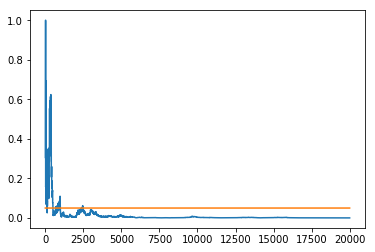

In [10]:
class DataGenerator:
    def __init__(self, p1, p2):
        # p1 and p2 are the probabilities of clicks for group 1 and group 2
        self.p1 = p1
        self.p2 = p2
        
    def next(self):
        click1 = 1 if (np.random.random() < self.p1) else 0
        click2 = 1 if (np.random.random() < self.p2) else 0
        return click1, click2
    
def get_p_values(T):
    det = T[0,0]*T[1,1] - T[0,1]*T[1,0]
    chi_squared = float(det) / T[0].sum() * det / T[1].sum() * T.sum() / T[:,0].sum() / T[:,1].sum()
    p = 1-chi2.cdf(x=chi_squared, df=1)
    return p

def run_experiment(p1, p2, N):
    data = DataGenerator(p1, p2)
    p_values = np.empty(N)
    T = np.zeros((2,2)).astype(np.float32)
    for i in range(N):
        c1, c2 = data.next()
        T[0, c1] += 1
        T[1, c2] += 1
        # We need to skip first few rows beause we can't divide by 0
        if i < 10:
            p_values[i] = None
        else:
            p_values[i] = get_p_values(T)
    plt.plot(p_values)
    plt.plot(np.ones(N)*0.05)
    plt.show()
    
run_experiment(0.1, 0.11, 20000)

#### Take away: Even when group A = group B, there's still a 5% chance we get a significant result showing the two groups are different when we choose 95% confidence interval.

#### Chi-square exercise

In [11]:
from scipy.stats import chi2_contingency

In [12]:
# The same dataset is used
clicks['count'] = np.ones(len(clicks))
df_T = clicks.groupby(['advertisement_id', 'action']).sum().reset_index()\
        .pivot(index = 'advertisement_id', columns = 'action', values = 'count')

chi2, p, dof, expected = chi2_contingency(df_T, correction=False)
print("chi2: {}, p: {}".format(chi2, p))

chi2: 10.332683816299898, p: 0.0013069502732125406


### More than 2 Groups

#### Bonferroni correction
- $\alpha_{new} = \frac{\alpha}{Number\ of\ tests}$
- Pairwise testing: compare every group against every other group
- $\alpha_{new} = \frac{\alpha}{N choose 2}$
- P-value < $\alpha_{new} \rightarrow$ significant

#### One-vs-the-Rest
- sum the counts for the groups that are part of the rest
- Still have 2x2 tables
- N groups, N tests
- $\alpha_{new} = \frac{\alpha}{N}$
- P-value < $\alpha_{new} \rightarrow$ significant

#### Post Hoc Testing
- The tests we just described are usually done after an initial test on a full contingency table
- E.g. Do a chi-square test on an Nx2 contingency table first
- If that gives us a significant p-value, follow-up with post hoc tests
- Bayesian A/B Tsting will handle this without any extra work

### Statistical Power
- Power = sensitivity = P(reject $H_0$ | $H_1$ is true)
- High power decreases the chance of getting False Negative (Did not reject $H_1$ when $H_1$ is true)
- FN = type 2 error
- p(FN) = FN rate = $\beta$
- Power = 1- $\beta$
- FP = type 1 error
- Highly desirable to just stick to fundamental concepts: TP, FP, TN, FN

#### Why quatify power?
- "Power analysis" can be used to determine number of samples we should collect for experiment
- 2 key things affect power: effect size and sample size
    - Effect size = difference between 2 groups: the larger the different, the easier to detect
    - sample size directly affects test statistic, thus the p-value as well
 
### Choosing Sample Size
- General rule of thumb $N = 16\frac{\sigma^2}{\delta^2}$
    - $\sigma^2$ = variance of data
    - $\delta^2$ = minimum difference you want to detect
- Many "sample size calculators" online that requires assumptions to be made

### Frequentist Statistics is Awkward
- The "rules" are counter-intuitive or vaybe even unethical
    - Ex: you're testing a drug, you know the science behind it, and you are confident it works. You start your test, and it's clearly performing well before experiment ends. Don't you want to give the drug to everyone and heal all the subjects? Statistics says you can't.
    - Another Ex: Conversion rate. Landing page B leads to more purchases. Can you stop early and make more money? Statistics says you can't.
- We'll see how Bayesian methods solve this problem.
- Typically requires less samples to meet some threshold.
- Can stop an experiment at any time and calculate exact probabilities from data collected.

## Bayesian A/B Testing

### Explore vs. Exploit
### Reinforcement Learning

### Epsilon-Greedy Algorithm
- Epsilon-greedy algorithm is one way to solve the explore-exploit dilemma (and it's intuitive). It's also used in reinforcement learning.
    - Ex: You have software serving 2 advertisement A and B. You will NOT blindly serve ad A and ad B an equal number of times. Instead, you will ADAPT to data you've collected. If ad A is performing better, show it more.
    - **Note: You can still do traditional A/B test after collecting data.**
    
### A Better Algorithm: UCB1
### Conjugate Priors
In Bayesian way, we treat $\theta$ as a random variable too, so **it has its own distribution**.
$$P(\theta|X) = \frac{P(X|\theta)P(\theta)}{P(X)} = \frac{P(X|\theta)P(\theta)}{Z}$$
- Z = normalizing constant
- $P(X|\theta)$ = likelihood (how likely is this data given $\theta$
- $P(\theta)$ = prior (old beliefs about $\theta$)
- $P(\theta|X)$ = posterior (new belief about $\theta$ after seeing data)

Conjugate priors give us elegemt solution for $P(\theta|X)$. If we choose specific distributions for $P(X|\theta)$ and $P(\theta)$, then we can **make $P(\theta|X)$ have the same type of distribution as $P(\theta)$**!

We know likelihood for click-through rate is Bernoulli:
$$P(X|\theta) = \prod_{i=1}^{N}\theta^{x_i}(1-\theta)^{1-x_i}$$
$\theta$ must be between 0 and 1.

#### Beta distribution
**Important Note: The formula below gives a distribution, just as the formula of Gaussian distribution**
$$ \theta \sim Beta(a,b) = \frac{\theta^{a-1}(1-\theta)^{b-1}}{B(a,b)}, where \ B(a,b) = \frac{\Gamma(a)\Gamma(b)}{\Gamma(a+b)}\  and\ \Gamma(n) = (n-1)!$$

#### Solve for the posterior
$$P(\theta|X) \propto [\prod_{i=1}^{N}\theta^{x_i}(1-\theta)^{1-x_i}] \theta^{a-1}(1-\theta)^{b-1} = \theta^{a-1+\sum_{i=1}^{N}x_i}(1-\theta)^{b-1+\sum_{i=1}^{N}x_i}$$
Same shape as Beta! Normalization constant doesn't depend on $\theta$

we see that: $P(\theta|X) = Beta(a', b')$, where $a' = a+ \sum_{i=1}^{N}x_i, b' = b+N-\sum_{i=1}^{N}x_i$

**Note: In Bayesian, we use beta distribution to estimate the distribution of $\theta$ (a probability), as compare to use point estimate for $\theta$ and asssume Gaussian distribution in frequentist.**

In terms of CTR problem: $a' = a+ number\ of\ clicks, b' = b+ number\ of\ noclicks$

#### Beta mean and variance
$$ E(\theta) = \frac{a}{a+b}$$
$$ var(\theta) = \frac{ab}{(a+b)^2(a+b+1)} $$
Same behavoir as approximated confidence interval. Variance gets smaller as we collect more data.

#### Prior
Beta(a=1, b=1) is equal to Uniform(0,1). It's called a non-informative prior.

In [36]:
from scipy.stats import beta

NUM_TRIALS = 10000
# True CTR
BANDIT_PROBABILITIES = [0.2, 0.5, 0.75]

class Bandit:
    def __init__(self, p):
        self.p = p
        self.a = 1
        self.b = 1
    
    # this returns 0 or 1
    def pull(self):
        return np.random.random() < self.p
    
    def sample(self):
        return np.random.beta(self.a, self.b)
    
    def update(self, x):
        self.a += x
        self.b += 1-x
        
# draw the pdf of each bandit
def plot(bandits, trial):
    x = np.linspace(0,1,200)
    for b in bandits:
        y = beta.pdf(x, b.a, b.b)
        plt.plot(x, y, label='real p: %.4f' % b.p)
    plt.title("Bendit distribution after %s trials" % trial)
    plt.legend()
    plt.show()
        
def experiment():
    bandits = [Bandit(p) for p in BANDIT_PROBABILITIES]
    
    sample_points = [5, 10, 50, 100, 500, 1000, 5000, 9999]
    samples_by_bandits = { i : 0 for i in bandits}
    for i in range(NUM_TRIALS):
        bestb = None
        maxsample = -1
        allsamples = []
        for b in bandits:
            sample = b.sample()
            allsamples.append("%.4f" % sample)
            if sample > maxsample:
                maxsample = sample
                bestb = b
                
        samples_by_bandits[bestb] += 1
        
        if i in sample_points:
            print("current samples: %s" % allsamples)
            print([samples_by_bandits[i] for i in bandits])
            plot(bandits, i)
        
        x = bestb.pull()
        bestb.update(x)

current samples: ['0.0125', '0.3478', '0.8903']
[2, 2, 2]


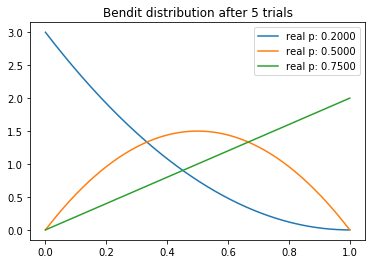

current samples: ['0.2815', '0.8845', '0.5995']
[2, 5, 4]


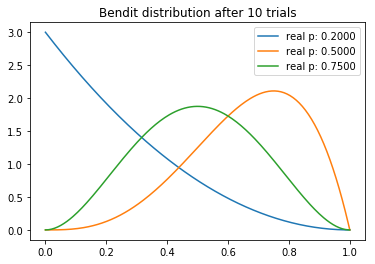

current samples: ['0.6707', '0.6039', '0.7286']
[2, 21, 28]


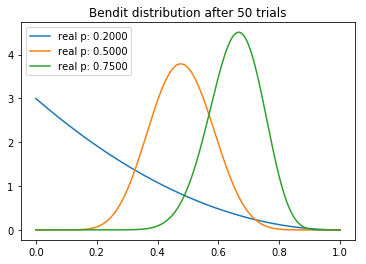

current samples: ['0.4540', '0.5424', '0.6508']
[2, 23, 76]


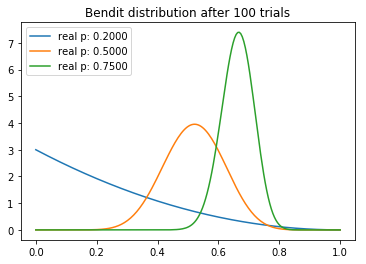

current samples: ['0.3178', '0.5628', '0.7038']
[15, 32, 454]


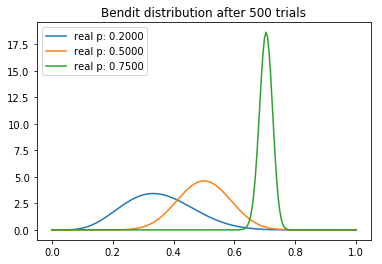

current samples: ['0.3172', '0.4611', '0.7237']
[17, 32, 952]


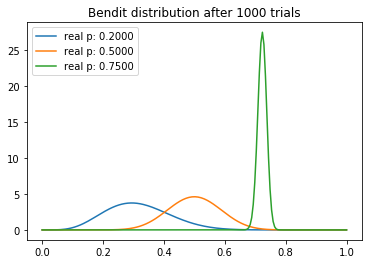

current samples: ['0.2863', '0.4896', '0.7456']
[17, 40, 4944]


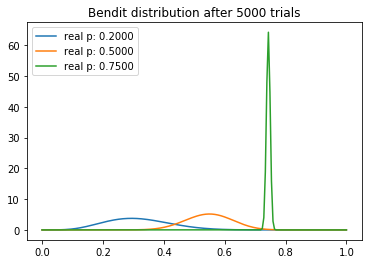

current samples: ['0.4097', '0.5702', '0.7438']
[17, 61, 9922]


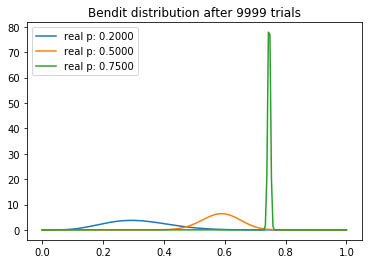

In [37]:
experiment()

Observation: 
- Lower performing bandits never become sharp.
- Although the lower performing distribution stay fat, we are almost certain its mean is lower than the highe performing one. There's no need to explore the lower performing distributions further. More exploits on the bandit with higher performance.

#### Thompson Sampling Convergence Demo
The next block of codes shows how the CTR converges to the best bandit when we use Bayesian bandit method. It means with Bayesian we can maximize the exploitation in A/B testing.

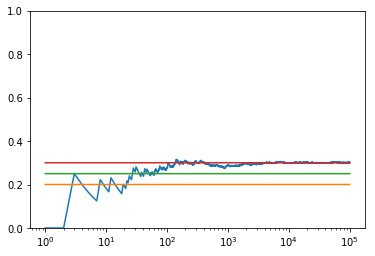

In [57]:
def run_experiment(p1, p2, p3, N):
    bandits = [Bandit(p1), Bandit(p2), Bandit(p3)]
    
    data = np.empty(N)
    
    for i in range(N):
        j = np.argmax([b.sample() for b in bandits])
        x = bandits[j].pull()
        bandits[j].update(x)
        
        data[i] = x
    cumulative_average_ctr = np.cumsum(data) / (np.arange(N) + 1)
#     print(data)
#     print(cumulative_average_ctr)
    
    plt.plot(cumulative_average_ctr)
    plt.plot(np.ones(N)*p1)
    plt.plot(np.ones(N)*p2)
    plt.plot(np.ones(N)*p3)
    plt.ylim((0,1))
    plt.xscale('log')
    plt.show()
    
run_experiment(0.2, 0.25, 0.3, 100000)

#### Confidence Interval Approximation vs. Beta Posterior
How accurate is the confidence interval we derived earlier? Visualize the approximated Gaussian that resulted from CLT and compare that to the Bayesian posterior.

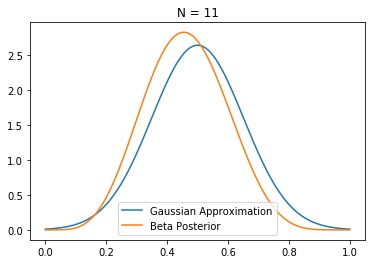

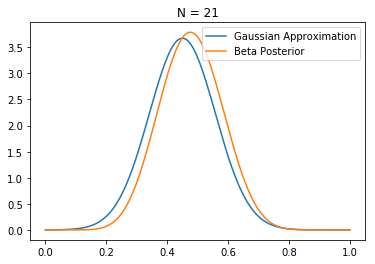

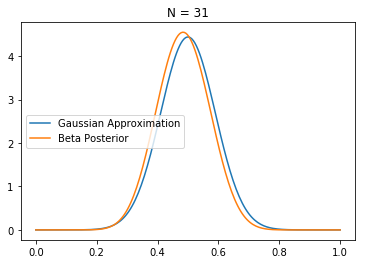

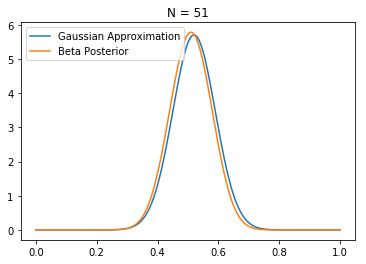

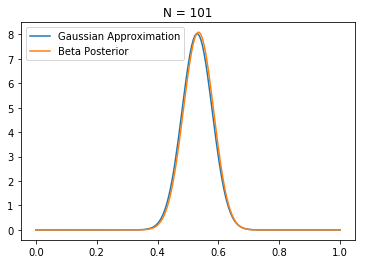

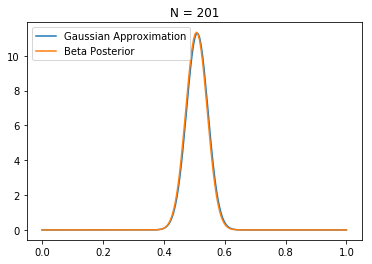

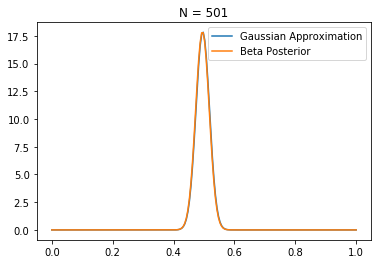

In [58]:
from scipy.stats import beta, norm

T = 501
true_ctr = 0.5
a, b = 1, 1
plot_indices = (10, 20, 30, 50, 100, 200, 500)
data = np.empty(T)
for i in range(T):
    x = 1 if np.random.random() < true_ctr else 0
    data[i] = x
    
    a += x
    b += 1-x
    
    if i in plot_indices:
        p = data[:i].mean()
        n = i + 1
        std = np.sqrt(p*(1-p)/n)
        
        x = np.linspace(0, 1, 200)
        g = norm.pdf(x, loc=p, scale=std)
        plt.plot(x, g, label='Gaussian Approximation')
        
        posterior = beta.pdf(x, a=a, b=b)
        plt.plot(x, posterior, label='Beta Posterior')
        plt.legend()
        plt.title("N = %s" % n)
        plt.show()

#### Adaptive Ad Server Exercise
Open two new command prompt windows and run scripts, server_solution.py and client.py, seprately.